In [54]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [40]:
import numpy as np
import pandas as pd

In [7]:
# set configurations for number of samples
sample_size = 100
nr_sample = 20
num_steps = 10
x_b = np.linspace(0,1,num_steps)

n_folds = 5

### Bounded distributions

In [8]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [50]:
edf_df = dem.get_edf(bounded_samples, x_b)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,label
0,0.0,0.19,0.30,0.41,0.48,0.57,0.66,0.74,0.82,1.0,arcsine
1,0.0,0.28,0.34,0.41,0.49,0.55,0.70,0.74,0.86,1.0,arcsine
2,0.0,0.20,0.31,0.40,0.49,0.51,0.59,0.65,0.69,1.0,arcsine


In [53]:
y = np.linspace(0.01,1,num_steps)
edf_df = dem.get_edf_v2(bounded_samples, y)
edf_df

,0,1,2,3,4,5,6,7,8,9,label
0,0.000038,0.021398,0.160272,0.239436,0.397090,0.533977,0.673097,0.858678,0.950285,0.999622,arcsine
1,0.000528,0.021389,0.073527,0.205764,0.405700,0.566418,0.638511,0.817018,0.907778,0.998795,arcsine
2,0.000210,0.036475,0.154846,0.256038,0.353549,0.630505,0.805343,0.928685,0.973402,0.999697,arcsine
3,0.000236,0.018614,0.062494,0.166863,0.421030,0.579242,0.693000,0.835219,0.937072,0.999945,arcsine
4,0.000008,0.044693,0.162051,0.299038,0.514662,0.677924,0.812607,0.910597,0.971636,0.999201,arcsine
...,...,...,...,...,...,...,...,...,...,...,...
115,0.007922,0.117694,0.263520,0.381176,0.508136,0.582726,0.652314,0.758773,0.852722,0.992191,uniform
116,0.010247,0.124657,0.198777,0.290884,0.449043,0.587860,0.722027,0.824913,0.921621,0.999650,uniform
117,0.003392,0.133420,0.217557,0.293770,0.379798,0.507458,0.633729,0.782594,0.895098,0.982153,uniform
118,0.006277,0.110894,0.250588,0.425198,0.538339,0.622793,0.707645,0.793020,0.930455,0.999990,uniform


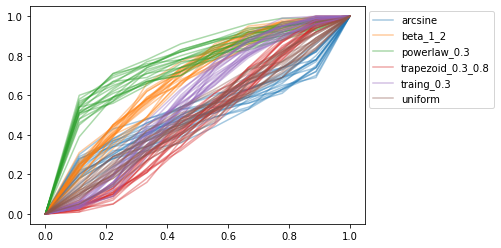

In [10]:
dem.get_edf_plot(edf_df, x_b)

In [2]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [30]:
sample = bounded_samples.iloc[0,:-1]
ecdf = ECDF(sample)
inverse_ecdf = interp1d(ecdf.y, ecdf.x)

In [31]:
y = np.linspace(0.01, 1, 10)
x = inverse_ecdf(y)

In [56]:
y

array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])

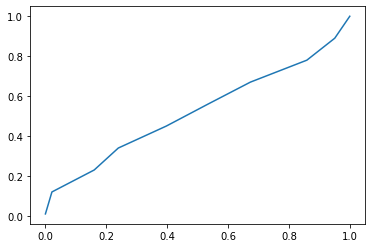

In [32]:
plt.plot(x,y)

In [16]:
def get_edf_v2(df, y):
    # df: a dataframe containing samples from different distribution
    # y:
    x = list()  # empty list to store cumulative probability
    for i in range(len(df)):
        ecdf = ECDF(df.iloc[i,:-1])
        inverse_ecdf = interp1d(ecdf.y, ecdf.x)
        x.append(inverse_ecdf(y))

    edf_df = pd.DataFrame(x)
    edf_df['label'] = df.iloc[:,-1].tolist()
    return edf_df 

In [34]:
y = np.linspace(0.01,1,10)
edf_df = get_edf_v2(bounded_samples, y)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,label
0,0.000038,0.021398,0.160272,0.239436,0.397090,0.533977,0.673097,0.858678,0.950285,0.999622,arcsine
1,0.000528,0.021389,0.073527,0.205764,0.405700,0.566418,0.638511,0.817018,0.907778,0.998795,arcsine
2,0.000210,0.036475,0.154846,0.256038,0.353549,0.630505,0.805343,0.928685,0.973402,0.999697,arcsine


In [57]:
np.mean(edf_df, axis=1)

0      0.483389
1      0.463543
2      0.513875
3      0.471371
4      0.539242
         ...   
115    0.511718
116    0.512968
117    0.482897
118    0.538520
119    0.478525
Length: 120, dtype: float64

In [58]:
np.std(edf_df, axis=1)

0      0.358093
1      0.358018
2      0.378241
3      0.371323
4      0.369638
         ...   
115    0.303431
116    0.332583
117    0.316418
118    0.320770
119    0.321925
Length: 120, dtype: float64

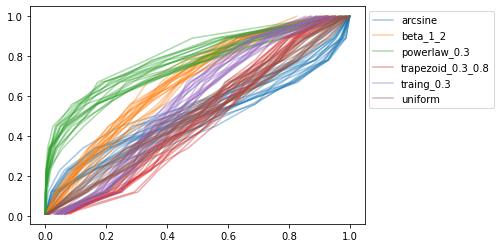

In [37]:
get_edf_plot_v2(edf_df,y)

In [36]:
def get_edf_plot_v2(df, y):
    names = df.iloc[:,-1].unique()
    fig, ax = plt.subplots()
    colors = get_default_plt_colors()
    handles = []
    
    for name, color in zip(names, colors):  # iterate over each distribution
        temp = df.loc[df.iloc[:,-1] == name].iloc[:, :-1].to_numpy()
        hh = ax.plot(temp.T, y, c=color, alpha=0.4, label=name)
        handles.append(hh[0] if isinstance(hh, list) else hh)
    ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1))

### SVM

In [41]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(1,21))

In [55]:
res_svm = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, n_folds, 'edf', 1)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

ValueError: Input contains infinity or a value too large for dtype('float64').

In [18]:
res_svm.to_csv('results/edf/res_svm_bounded.csv')

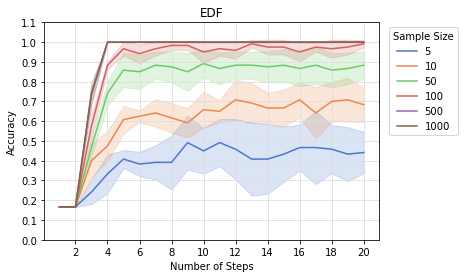

In [42]:
cm.plot_cv_numsteps_samplesize(res_svm, 'EDF')

### Logistic Regression

In [36]:
res_lr = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, n_folds, 'edf', 2)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

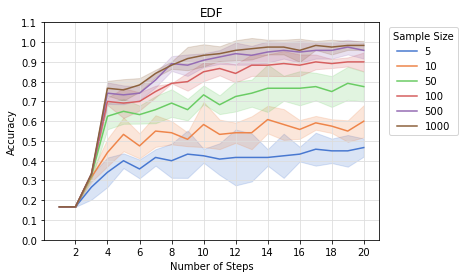

In [43]:
cm.plot_cv_numsteps_samplesize(res_lr,'EDF')

### Heavytail distributions

In [44]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [45]:
perc_95 = np.percentile(heavytail_samples.iloc[:,:-1],95)
x_h = np.linspace(0,perc_95,num_steps)
edf_df = dem.get_edf(heavytail_samples, x_h)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,label
0,0.0,0.60,0.77,0.87,0.89,0.92,0.94,0.95,0.95,0.95,cauchy
1,0.0,0.57,0.81,0.90,0.95,0.97,0.97,0.98,0.99,0.99,cauchy
2,0.0,0.54,0.68,0.78,0.85,0.88,0.91,0.92,0.93,0.95,cauchy


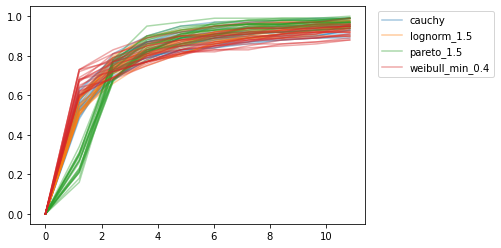

In [46]:
dem.get_edf_plot(edf_df, x_h)

### SVM

In [47]:
res_svm_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, n_folds, 'edf', 1, transform = True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

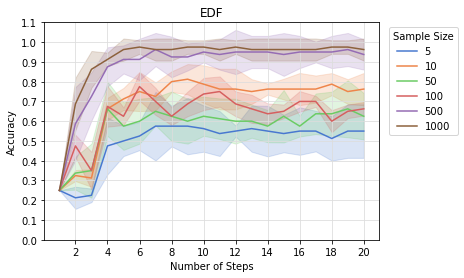

In [48]:
cm.plot_cv_numsteps_samplesize(res_svm_ht,'EDF')

### Logistic Regression

In [49]:
res_lr_ht = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, n_folds, 'edf', 2, transform = True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

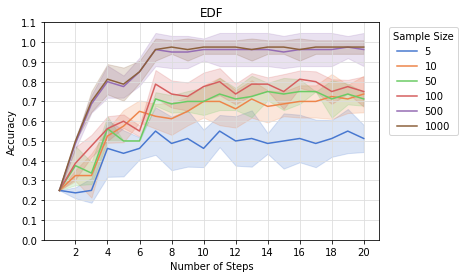

In [50]:
cm.plot_cv_numsteps_samplesize(res_lr_ht,'EDF')